In [1]:
!pip install xgboost

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.dates as mdates
from sklearn.model_selection import TimeSeriesSplit

In [3]:
#first data_set. OPTION #1 just clean data with outliers 
df = pd.read_csv('clean_data.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type
Txn_date,,,,,,,,,
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop
2016-01-02,15662366857,272756,Computers,Electronics,3,527,166.005,1747.005,e-Shop
2016-01-02,31795262740,275166,Women,Bags,4,531,223.020,2347.020,e-Shop
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar
2016-01-02,81365620177,274222,Kids,Footwear,3,373,117.495,1236.495,e-Shop
...,...,...,...,...,...,...,...,...,...
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop
2018-12-31,89405298920,269866,Mens,Footwear,5,1340,703.500,7403.500,e-Shop
2018-12-31,79443912873,267426,Women,Bags,1,193,20.265,213.265,Brick and Mortar


In [3]:
#second data_set. OPTION #2 Clean data WITHOUT outliers 
df = pd.read_csv('data_no_outliers.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type
Txn_date,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop
...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop


<Axes: ylabel='Frequency'>

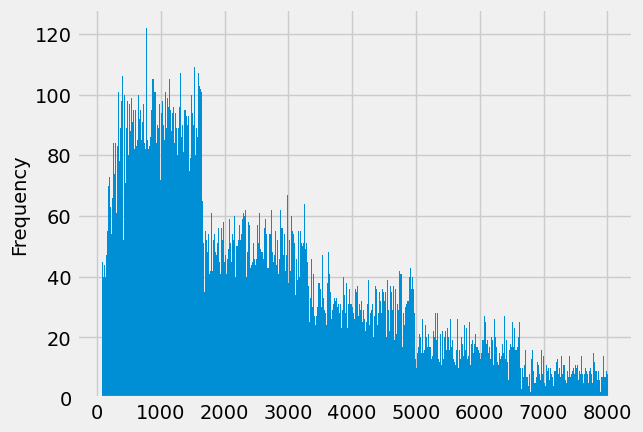

In [4]:
#HIST outlier analysis
df['Total_Amt'].plot(kind='hist', bins=500)

<Axes: title={'center': 'Outliers'}, xlabel='Txn_date'>

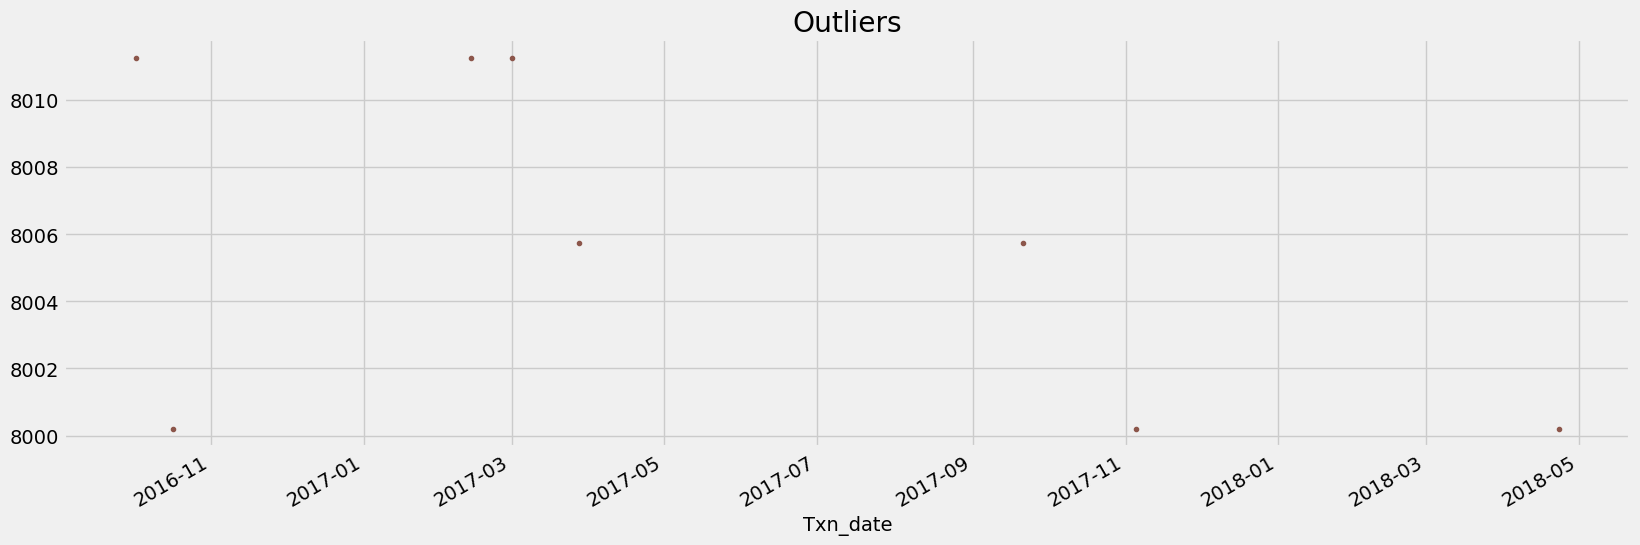

In [5]:
df.query('Total_Amt > 8000')['Total_Amt'] \
    .plot(style='.',
          figsize=(18, 6),
          color=color_pal[5],
          title='Outliers')

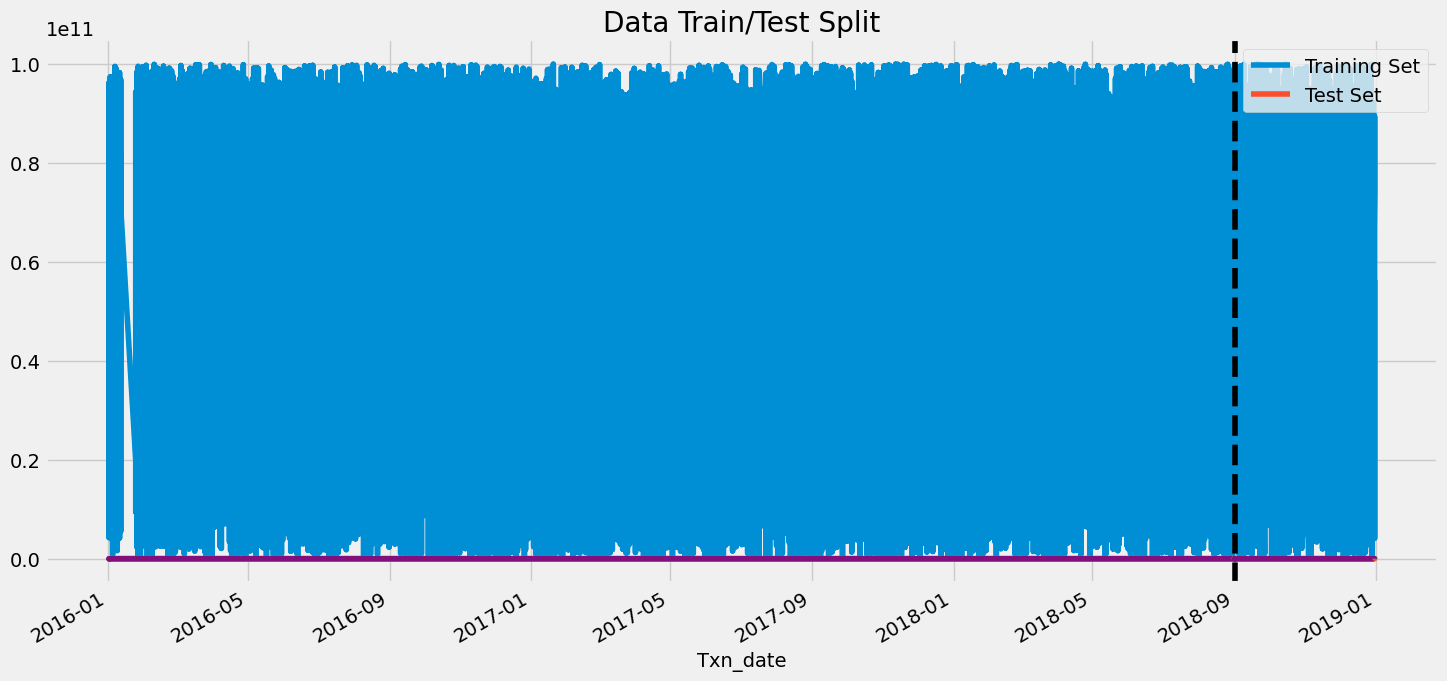

In [6]:
#train set
train = df.loc[df.index < pd.Timestamp('2018-09-01')]
test = df.loc[df.index >= pd.Timestamp('2018-09-01')]

fig, ax = plt.subplots(figsize=(16, 8))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline(pd.Timestamp('2018-09-01'), color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()




In [7]:
tss = TimeSeriesSplit(n_splits=4, test_size=24*180*1, gap=24)
df = df.sort_index()

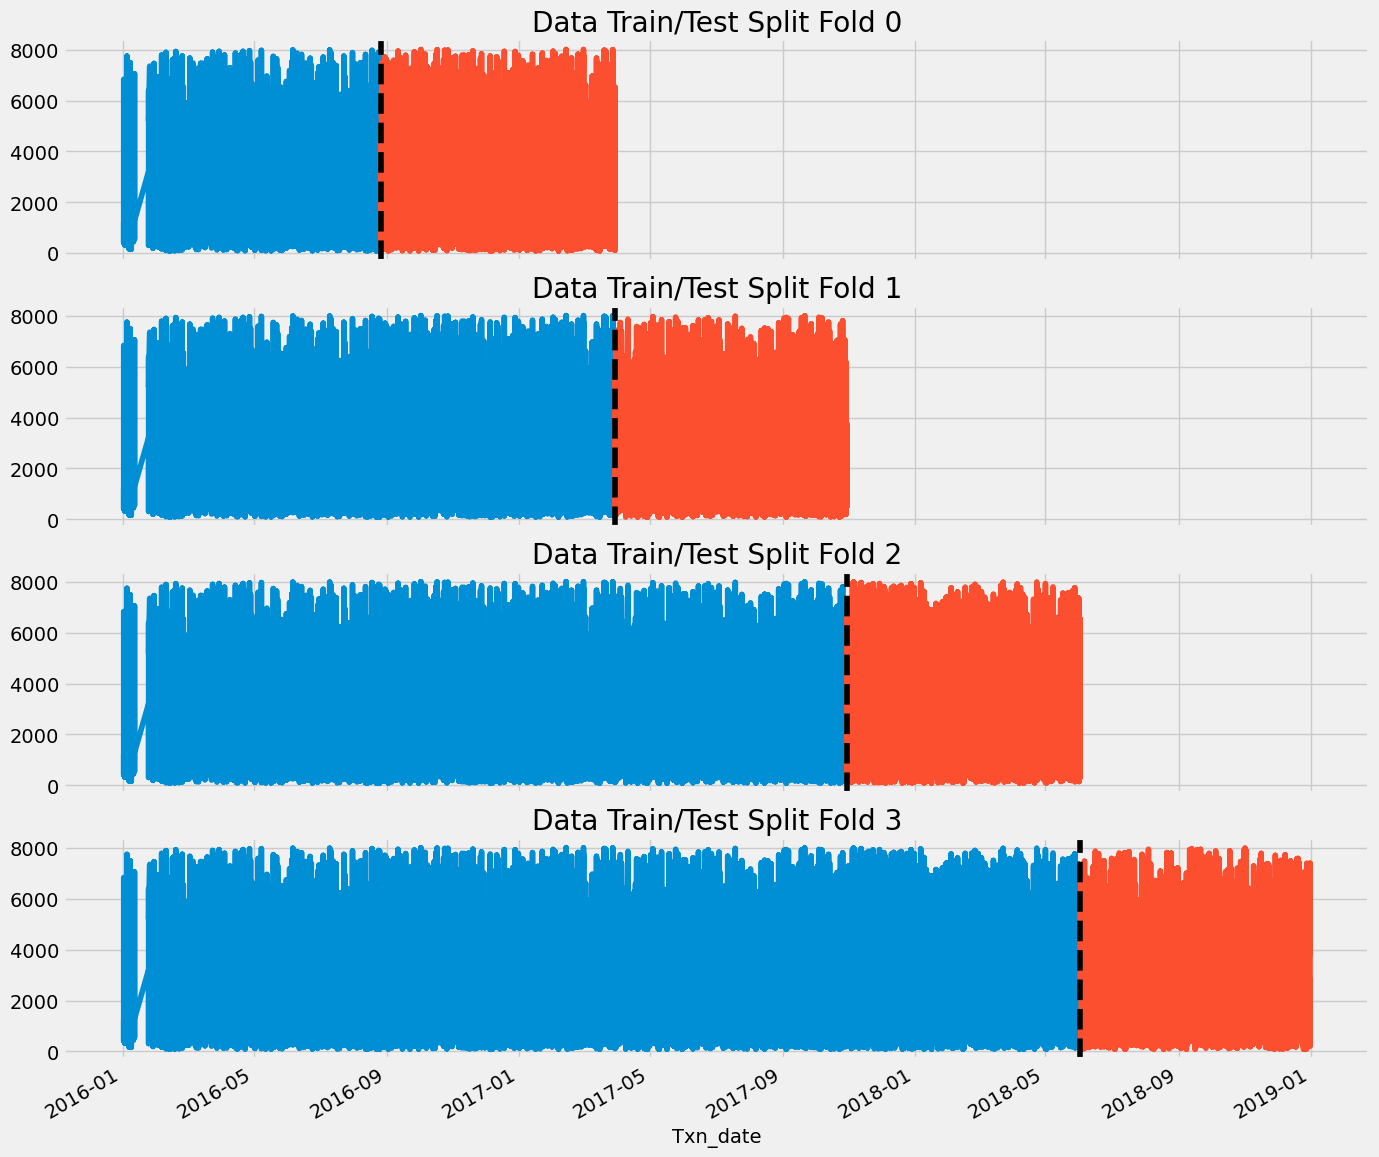

In [8]:


# define the number of splits
n_splits = 4 # Adjust this number based on your data size
tss = TimeSeriesSplit(n_splits=n_splits)

fig, axs = plt.subplots(n_splits, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['Total_Amt'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Total_Amt'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()


In [9]:
#Feature different aproach (function)
def features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = features(df)

In [10]:
def add_lags(df):
    target_map = df['Total_Amt'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [11]:
df = add_lags(df)

In [12]:
tss = TimeSeriesSplit(n_splits=4, test_size=24*180*1, gap=24)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = features(train)
    test = features(test)

    FEATURES = ['dayofyear', 'dayofweek', 'dayofmonth', 'quarter', 'month', 'year', 'lag1','lag2','lag3']
    TARGET = 'Total_Amt'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[11:57:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3173.08931	validation_1-rmse:3187.87911
[100]	validation_0-rmse:2103.46488	validation_1-rmse:2232.78712
[200]	validation_0-rmse:1909.64895	validation_1-rmse:2013.56610
[300]	validation_0-rmse:1878.95214	validation_1-rmse:1967.45541
[400]	validation_0-rmse:1872.64700	validation_1-rmse:1956.68683
[500]	validation_0-rmse:1869.41086	validation_1-rmse:1953.77078
[582]	validation_0-rmse:1867.24595	validation_1-rmse:1953.49632
[11:57:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3179.76638	validation_1-rmse:3173.23646
[100]	validation_0-rmse:2120.96697	validation_1-rmse:2143.6035

In [13]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 1926.8664
Fold scores:[1953.412197060899, 1918.3443799436423, 1941.3912087498036, 1894.317757534296]


In [14]:
# Retrain on all data
df = features(df)

FFEATURES = ['dayofyear', 'dayofweek', 'dayofmonth', 'quarter', 'month', 'year', 'lag1','lag2','lag3']
TARGET = 'Total_Amt'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[11:57:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3177.98274
[100]	validation_0-rmse:2122.88087
[200]	validation_0-rmse:1936.87849
[300]	validation_0-rmse:1909.44417
[400]	validation_0-rmse:1904.71419
[499]	validation_0-rmse:1903.10427


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [15]:
df.index.max()

Timestamp('2018-12-31 00:00:00')

In [16]:
# Create forecasting dataframe
future = pd.date_range('2017-12-31','2018-12-31', freq='1M')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = features(df_and_future)
df_and_future = add_lags(df_and_future)

In [17]:
future_w_features = df_and_future.query('isFuture').copy()

In [18]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

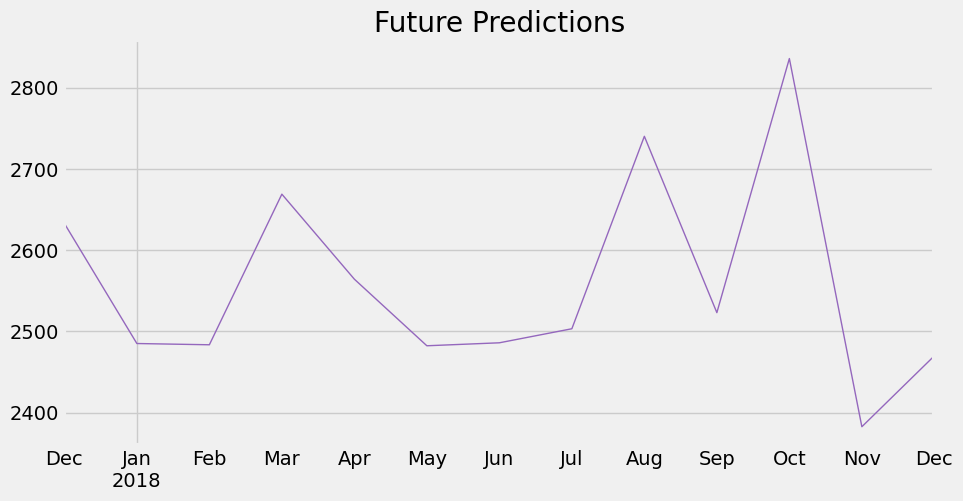

In [19]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

In [20]:
future_w_features

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type,dayofweek,...,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture,pred
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,...,12,2017,365,31,52,503.880,474.045,NaN,True,2632.820068
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,1,2018,31,31,5,592.280,1911.650,NaN,True,2485.056152
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,2,2018,59,28,9,2397.850,2171.325,NaN,True,2483.504395
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,3,2018,90,31,13,2333.760,692.835,NaN,True,2668.800781
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,4,2018,120,30,18,1743.690,1044.225,NaN,True,2564.214600
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,5,2018,151,31,22,417.690,1947.010,NaN,True,2482.281982
2018-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,6,2018,181,30,26,1131.520,1558.050,NaN,True,2485.938232
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,7,2018,212,31,31,807.755,4349.280,NaN,True,2503.220215
2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,8,2018,243,31,35,1688.440,3193.450,NaN,True,2739.986816
2018-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,...,9,2018,273,30,39,1110.525,2701.725,NaN,True,2523.027588


In [21]:
df.loc['2017-12-31':'2018-12-31']


,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
Txn_date,,,,,,,,,,,,,,,,,,,,
2017-12-31,96411404312,270906,Cameras,Electronics,5,1135,595.875,6270.875,e-Shop,6,4,12,2017,365,31,52,503.88,474.045,NaN,False
2017-12-31,31314199553,274511,Mens,Bags,3,398,125.370,1319.370,e-Shop,6,4,12,2017,365,31,52,503.88,474.045,NaN,False
2017-12-31,19409269608,272403,Mens,Clothing,4,135,56.700,596.700,e-Shop,6,4,12,2017,365,31,52,503.88,474.045,NaN,False
2017-12-31,74587942310,271137,Electric appliances,Home and kitchen,4,103,43.260,455.260,e-Shop,6,4,12,2017,365,31,52,503.88,474.045,NaN,False
2017-12-31,85277089271,273684,Bedding and Towels,Home and kitchen,2,1009,211.890,2229.890,e-Shop,6,4,12,2017,365,31,52,503.88,474.045,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop,0,4,12,2018,365,31,1,552.50,5066.425,4092.92,False
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop,0,4,12,2018,365,31,1,552.50,5066.425,4092.92,False
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop,0,4,12,2018,365,31,1,552.50,5066.425,4092.92,False


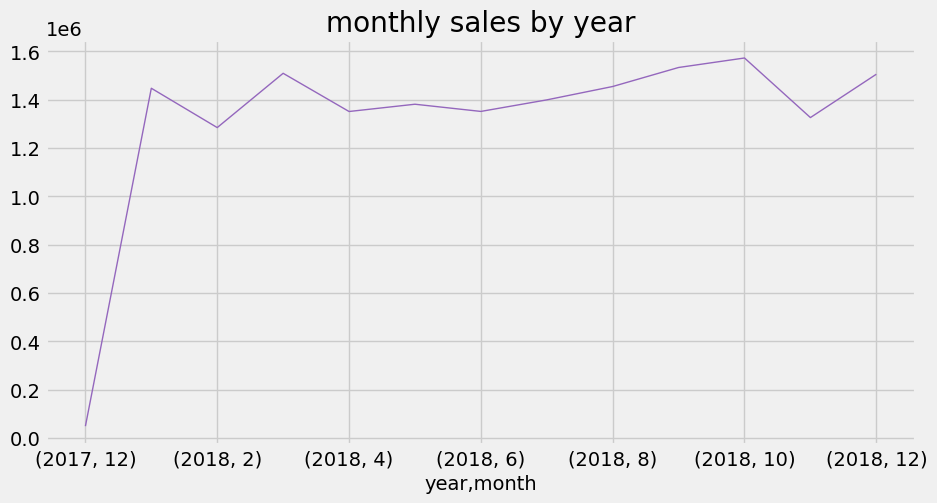

In [22]:
#actual sales
plt.figure(figsize=(12,6))
df.loc['2017-12-31':'2018-12-31'].groupby(['year', 'month'])['Total_Amt'].sum().plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='monthly sales by year')
plt.show()

In [23]:

total_amt_df = df.loc['2017-12-31':'2018-12-31', ['Total_Amt']]


pred_df = future_w_features[['pred']]

# Merge on index
merged_df = pd.merge(total_amt_df, pred_df, left_index=True, right_index=True)


merged_df


,Total_Amt,pred
2017-12-31,6270.875,2632.820068
2017-12-31,1319.370,2632.820068
2017-12-31,596.700,2632.820068
2017-12-31,455.260,2632.820068
2017-12-31,2229.890,2632.820068
...,...,...
2018-12-31,2794.545,2469.906982
2018-12-31,1176.825,2469.906982
2018-12-31,2045.355,2469.906982
2018-12-31,474.045,2469.906982
